<a href="https://colab.research.google.com/github/Rakshithg6/covid-19-CNN-model/blob/main/COVID_19_CNN_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import Flatten
from keras. layers import MaxPooling2D
from keras.layers import Dense
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
model=Sequential()
model.add(Conv2D(32,(3,3),input_shape=(64,64,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(34,(5,5),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(units=128,activation='relu'))
model.add(Dense(units=130,activation='relu'))
model.add(Dense(units=115,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))

**AlexNet**

In [ ]:
from tensorflow import keras
model=keras.models.Sequential([
    keras.layers.Conv2D(filters=128, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(64,64,3)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3)),
    keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=256, kernel_size=(1,1), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=256, kernel_size=(1,1), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(1024,activation='relu'),
    #keras.layers.Dropout(0.5),
    keras.layers.Dense(1024,activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1,activation='sigmoid')


])

**Transfer Learning**

In [ ]:
import tensorflow as tf
resnet_model = Sequential()

pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(64,64,3),
                   pooling='avg',classes=2,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dense(1, activation='sigmoid'))

94765736/94765736 [==============================] - 1s 0us/step


In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
vgg_model = Sequential()
base_model = VGG16(weights="imagenet", include_top=False, input_shape=(64,64,3))
base_model.trainable = False
vgg_model.add(base_model)
vgg_model.add(Flatten())
vgg_model.add(Dense(512, activation='relu'))
vgg_model.add(Dense(1, activation='sigmoid'))

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
from tensorflow.keras.applications.vgg19 import VGG19
vgg19_model=Sequential()
vgg = VGG19(weights="imagenet", include_top=False, input_shape=(64,64,3))
vgg.trainable = False
vgg19_model.add(vgg)
vgg19_model.add(Flatten())
vgg19_model.add(Dense(512, activation='relu'))
vgg19_model.add(Dense(1, activation='sigmoid'))

80134624/80134624 [==============================] - 1s 0us/step


In [ ]:
model.compile(optimizer='adadelta',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255,shear_range = 0.2,zoom_range = 0.4,horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)


In [ ]:
training_set =train_datagen.flow_from_directory('/content/drive/MyDrive/Deep Learning Contents/Deep Learning (26th April to 30th April, 2022)/Day 2/Afternoon/covid_data_updated/Train',target_size = (64, 64),batch_size = 8,class_mode = 'binary')
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Deep Learning Contents/Deep Learning (26th April to 30th April, 2022)/Day 2/Afternoon/covid_data_updated/test',target_size = (64, 64),batch_size = 8,class_mode = 'binary')

Found 238 images belonging to 2 classes.
Found 39 images belonging to 2 classes.


In [ ]:
model.fit(training_set,steps_per_epoch = 20,epochs = 100)

Epoch 1/100
20/20 [==============================] - 4s 207ms/step - loss: 0.7379 - accuracy: 0.4810
Epoch 2/100
20/20 [==============================] - 7s 317ms/step - loss: 0.7475 - accuracy: 0.4557
Epoch 3/100
20/20 [==============================] - 4s 198ms/step - loss: 0.7322 - accuracy: 0.4810
Epoch 4/100
20/20 [==============================] - 8s 373ms/step - loss: 0.7309 - accuracy: 0.4812
Epoch 5/100
20/20 [==============================] - 4s 195ms/step - loss: 0.7389 - accuracy: 0.4557
Epoch 6/100
20/20 [==============================] - 4s 195ms/step - loss: 0.7316 - accuracy: 0.4684
Epoch 7/100
20/20 [==============================] - 7s 332ms/step - loss: 0.7292 - accuracy: 0.4688
Epoch 8/100
20/20 [==============================] - 4s 196ms/step - loss: 0.7304 - accuracy: 0.4625
Epoch 9/100
20/20 [==============================] - 5s 255ms/step - loss: 0.7083 - accuracy: 0.5127
Epoch 10/100
20/20 [==============================] - 5s 251ms/step - loss: 0.7320 - accura

In [ ]:
test_loss, test_acc = model.evaluate(test_set, verbose=2)

print("\n\n")
print("Test Loss: \t", test_loss, "\n")
print("Test accuracy: \t", test_acc, "\n")

5/5 - 1s - loss: 0.6620 - accuracy: 0.7692 - 1s/epoch - 253ms/step



Test Loss: 	 0.6620224118232727 

Test accuracy: 	 0.7692307829856873 



In [ ]:
import numpy as np
from keras.preprocessing import image
import keras.utils as image
test_image =image.load_img('/content/drive/MyDrive/Deep Learning Contents/Deep Learning (26th April to 30th April, 2022)/Day 2/Afternoon/covid_data_updated/test/Non Covid/Non_Corona1_138.jpg',target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = resnet_model.predict(test_image)
print(result)
training_set.class_indices
if result[0][0] > 0.5:
  result[0][0] = 1
else:
  result[0][0] = 0

if result[0][0] == 1:
  prediction = 'Normal'
else:
  prediction = 'Corona'
print(prediction)


1/1 [==============================] - 0s 113ms/step
[[0.28330296]]
Corona


**XAI Methods for Images**

LIME

SHAP

GRAD-CAM

SMOOTHGRAD

SALIENCY MAPS

Occlusion Sensitivity

**SHAP**

In [ ]:
!pip install shap
import shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.5/540.5 kB 9.0 MB/s eta 0:00:00


In [ ]:
print(type(test_set))
tmp1, tmp2 = next(test_set)
background = shap.utils.sample(tmp1, 5)
explainer = shap.DeepExplainer(model, background)

<class 'keras.src.preprocessing.image.DirectoryIterator'>


/usr/local/lib/python3.10/dist-packages/shap/explainers/_deep/deep_tf.py:99: UserWarning: Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
  warnings.warn("Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.")


In [ ]:
# Choose a random sample from the test set to explain (against the background)

sample_index = np.random.randint(0, background.shape[0])
sample_image = background[sample_index]

In [ ]:
sample_image_batch = np.expand_dims(sample_image, axis=0)  # Add batch dimension
shap_values = explainer.shap_values(sample_image_batch)
sampled_images_array_scaled = sample_image_batch * 255
sampled_images_array_scaled = sampled_images_array_scaled.astype(np.uint8)


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:452: UserWarning: `tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.
  warnings.warn(


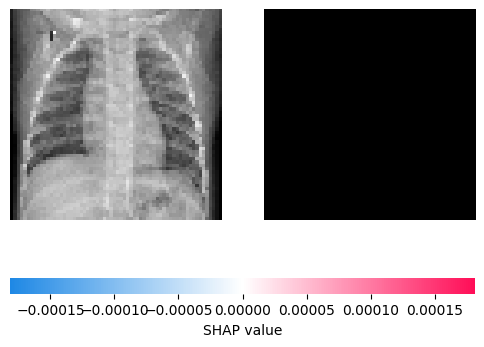

(1, 64, 64, 3)
-0.0002803692186716944
0.0004008485993836075


In [ ]:
# Visualize the SHAP values
shap.image_plot(shap_values,sampled_images_array_scaled)
print(sampled_images_array_scaled.shape)
print(np.min(shap_values))
print(np.max(shap_values))

**SmoothGRAD**

perturbed_image_batch: 
 (1, 64, 64, 3) 



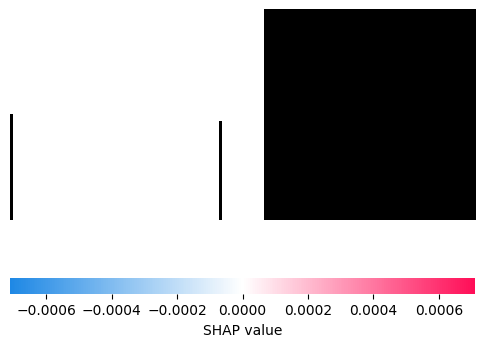

perturbed_image_batch: 
 (1, 64, 64, 3) 



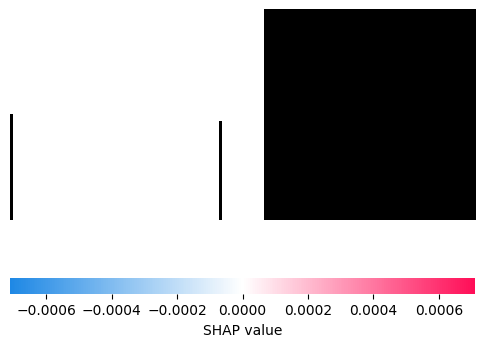

perturbed_image_batch: 
 (1, 64, 64, 3) 



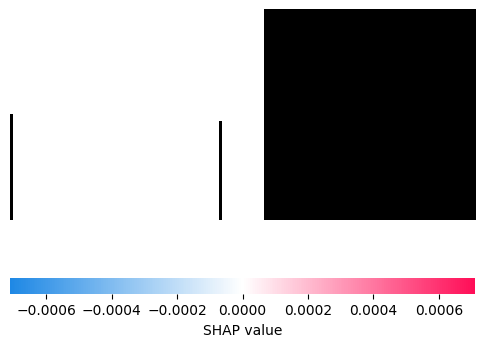

perturbed_image_batch: 
 (1, 64, 64, 3) 



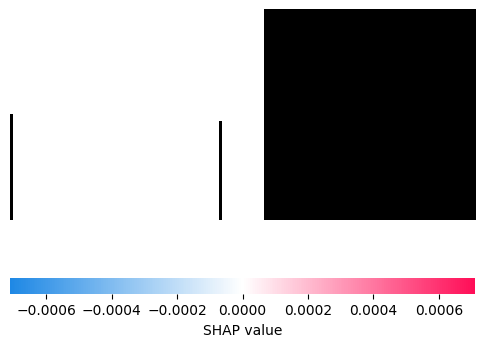

perturbed_image_batch: 
 (1, 64, 64, 3) 



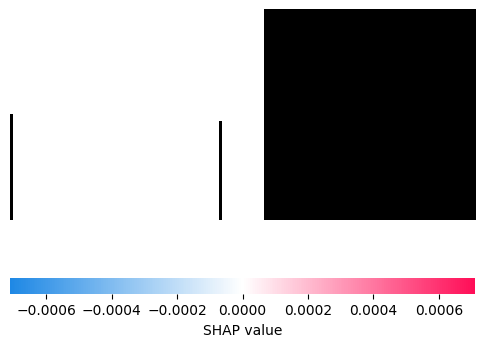

perturbed_image_batch: 
 (1, 64, 64, 3) 



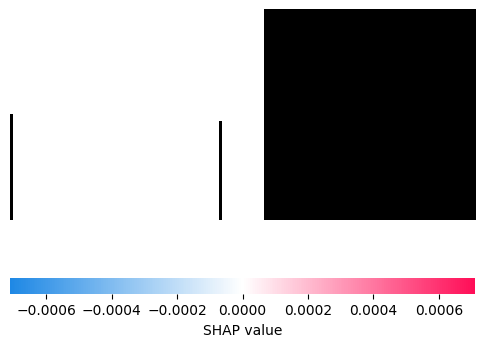

perturbed_image_batch: 
 (1, 64, 64, 3) 



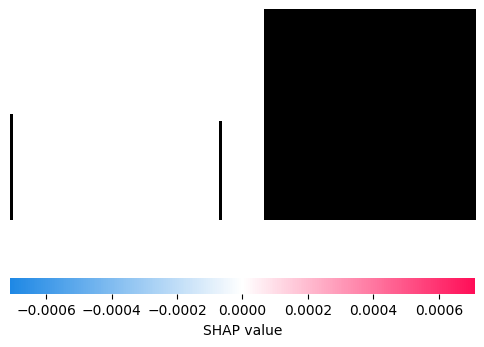

perturbed_image_batch: 
 (1, 64, 64, 3) 



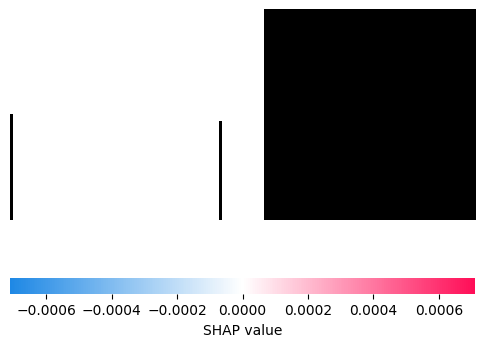

perturbed_image_batch: 
 (1, 64, 64, 3) 



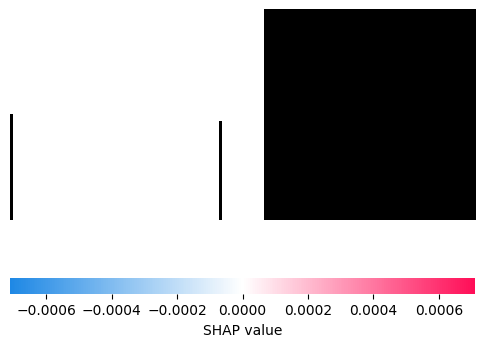

perturbed_image_batch: 
 (1, 64, 64, 3) 



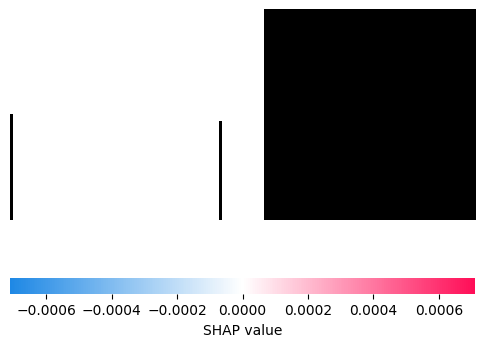

In [ ]:
NUM_ITERATIONS = 10 # equal to number of images that we wish to generate
shap_values_list = []
for _ in range(NUM_ITERATIONS):
    perturbed_image = sampled_images_array_scaled + np.random.normal(loc=0, scale=0.1, size=sampled_images_array_scaled.shape)
    perturbed_image = np.clip(perturbed_image, 0, 1)
    perturbed_image_batch = perturbed_image
    print("perturbed_image_batch: \n", perturbed_image_batch.shape, "\n")
    shap_values = explainer.shap_values(perturbed_image_batch)
    shap.image_plot(shap_values, perturbed_image_batch)
    shap_values_list.append(shap_values)

#print(shap_values_list[0])

In [ ]:
!pip install lime
import lime
from lime import lime_image

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 5.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283835 sha256=3a91f107efd12f124e21d0beb0d51505a743eff4d3f30f532023c45a9514a5a5
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [ ]:
!pip install lime shap
#import lime
#import lime.lime_image
import shap
from skimage.segmentation import mark_boundaries

In [ ]:
explainer = lime_image.LimeImageExplainer()
explanation = explainer.explain_instance(background[sample_index].astype('double'), model.predict, hide_color=0, num_samples=1000)

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 112ms/step


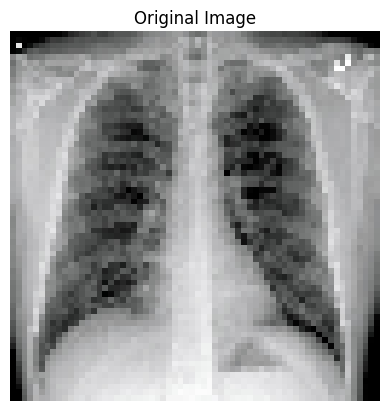

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(background[sample_index])
plt.title('Original Image')
plt.axis('off')
plt.show()

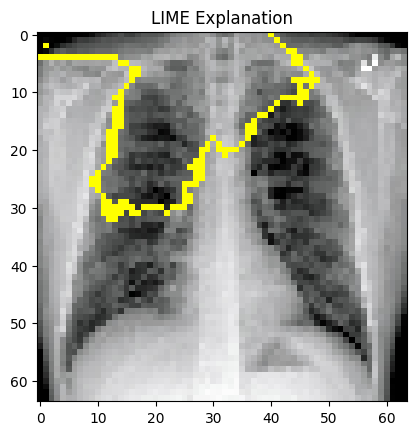

In [ ]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=False)
plt.imshow(mark_boundaries(temp, mask))
plt.title("LIME Explanation")
plt.show()

In [ ]:
tf.__version__

In [ ]:
shap.__version__